In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('/content/drive/My Drive/DCU/Practicum/godBlessMe/merged_hourly.csv')
df.set_index('timestamp', inplace=True)

# 1.df: btc open high low close volume xrp_vwap eth_vwap

In [4]:
df.tail()

,open,high,low,close,volume,xrp_vwap,eth_vwap
timestamp,,,,,,,
2025-02-12 08:00:00,96058.0,96434.0,96055.0,96350.0,20.404847,2.402512,2603.661341
2025-02-12 09:00:00,96353.0,96356.0,96030.0,96125.0,8.375477,2.404548,2605.944509
2025-02-12 10:00:00,96124.0,96195.0,95917.0,95977.0,27.868397,2.404944,2608.004687
2025-02-12 11:00:00,95976.0,96355.0,95976.0,96083.0,37.066567,2.406846,2609.666888
2025-02-12 12:00:00,96120.0,96352.0,96114.0,96335.0,1.702001,2.409158,2611.675339


In [5]:
df2 = df.copy()

In [6]:
df2.index = pd.to_datetime(df2.index)

In [7]:
type(df2.index)

pandas.core.indexes.datetimes.DatetimeIndex

# 2.Add technical features

## 2.0 Function to plot technical indicators


## 2.1 Bollinger Bands:
> A volatility indicator that consists
of a moving average (MA) and two standard deviation lines
(BB up and BB dn) above and below the moving average.

In [8]:
def bollingerBands(df, window=20, num_std=2, column='close'):
    """
    Function to calculate Bollinger Bands.

    Parameters:
    df (pd.DataFrame): DataFrame containing bitcoin price data.
    window (int): Period for calculating the moving average (default: 20).
    num_std (int): Multiplier for the standard deviation (default: 2).
    column (str): Column name to use for calculations (default: 'close').

    Returns:
    pd.DataFrame: DataFrame with Bollinger Bands added.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    result = df.copy()

    # Calculate the moving average
    result['bb_ma'] = result[column].rolling(window=window).mean()

    # Calculate standard deviation
    std = result[column].rolling(window=window).std()

    # Calculate the Upper Band
    result['bb_upper'] = result['bb_ma'] + (std * num_std)

    # Calculate the Lower Band
    result['bb_lower'] = result['bb_ma'] - (std * num_std)

    # Calculate bandwidth
    result['bb_bandwidth'] = (result['bb_upper'] - result['bb_lower']) / result['bb_ma']

    # Calculate %B
    result['bb_percent_b'] = (result[column] - result['bb_lower']) / (result['bb_upper'] - result['bb_lower'])

    return result

In [9]:
# Add bollinger bands
df_with_bollinger = bollingerBands(df2)

In [10]:
df_with_bollinger

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b
timestamp,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,NaN,NaN
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,NaN,NaN
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,NaN,NaN
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,NaN,NaN
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12 08:00:00,96058.00,96434.00,96055.00,96350.00,20.404847,2.402512,2603.661341,95966.40,97104.565911,94828.234089,0.023720,0.668517
2025-02-12 09:00:00,96353.00,96356.00,96030.00,96125.00,8.375477,2.404548,2605.944509,95931.45,96999.502724,94863.397276,0.022267,0.590609
2025-02-12 10:00:00,96124.00,96195.00,95917.00,95977.00,27.868397,2.404944,2608.004687,95881.30,96829.518962,94933.081038,0.019779,0.550463


In [11]:
df_with_bollinger.describe()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b
count,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26262.000000,26262.000000,26262.000000,26262.000000,26262.000000
mean,43258.611821,43413.315913,43098.366551,43260.662449,87.483219,0.662769,2281.236520,43241.951554,43958.862777,42525.040331,0.032597,0.506845
std,23594.339700,23684.310212,23501.427484,23596.522828,119.620629,0.535726,781.911931,23578.533695,24003.155166,23168.774460,0.026586,0.327919
min,15620.000000,15741.000000,15479.000000,15632.000000,0.000000,0.298072,962.303707,15776.500000,15959.379310,15367.809561,0.001638,-0.536168
25%,24786.000000,24899.990000,24653.000000,24785.000000,24.316579,0.428324,1640.538869,24685.800000,25199.464709,24334.609321,0.014663,0.265658
50%,35092.000000,35216.030000,34982.000000,35087.000000,49.416378,0.519169,2040.648398,35043.125000,35565.312062,34574.735649,0.025098,0.512431
75%,61842.000000,62043.000000,61622.000000,61847.000000,103.593708,0.616667,2964.144626,61888.887500,62938.129454,60684.297341,0.041380,0.746798
max,108293.000000,109356.000000,107655.000000,108276.000000,2477.217741,3.306017,4067.575000,106935.100000,110845.138588,105973.466543,0.226227,1.549197


In [12]:
def plot_indicators(df, indicator_name=None, date=None, max_ticks=24):
    """
    Function to plot Bitcoin price data with technical indicators for a specific day.

    Parameters:
    df (pd.DataFrame): DataFrame containing bitcoin price data and indicators.
    indicator_name (str, optional): The technical indicator to plot.
                                   Supported indicators: 'bollinger_bands', 'bb_bandwidth', 'bb_percent_b',
                                                        'all_bb' (all Bollinger Band indicators)
    date (str, optional): The specific date to plot in 'YYYY-MM-DD' format. If None, plots all data.
    max_ticks (int, optional): Maximum number of ticks to display on x-axis (default: 24).
    """
    # Make a copy of the dataframe to avoid modifying the original
    df_plot = df.copy()

    # Ensure the index is a DatetimeIndex
    if not isinstance(df_plot.index, pd.DatetimeIndex):
        df_plot.index = pd.to_datetime(df_plot.index)

    # Filter data for the specific date if provided
    if date:
        date_obj = pd.to_datetime(date)
        next_date = date_obj + pd.Timedelta(days=1)
        df_plot = df_plot[(df_plot.index >= date_obj) & (df_plot.index < next_date)]

        # Set title suffix with the date
        date_str = date_obj.strftime('%Y-%m-%d')
        title_suffix = f" ({date_str})"
    else:
        title_suffix = ""

    # Set up the figure and subplots based on the selected indicator
    if indicator_name == 'all_bb':
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15), gridspec_kw={'height_ratios': [3, 1, 2]}, sharex=True)
    elif indicator_name in ['bb_bandwidth', 'bb_percent_b']:
        height_ratio = [3, 2] if indicator_name == 'bb_percent_b' else [3, 1]
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': height_ratio},sharex=True)
    else:
        fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the price chart
    ax1.plot(df_plot.index, df_plot['close'], label='Close Price', color='black', linewidth=1.5)
    ax1.set_ylabel('Price', fontsize=12)
    ax1.set_title(f'Bitcoin Price{title_suffix}', fontsize=16)
    ax1.grid(alpha=0.3)

    # Plot specific indicators
    if indicator_name == 'bollinger_bands' or indicator_name == 'all_bb':
        # Plot Bollinger Bands
        ax1.plot(df_plot.index, df_plot['bb_upper'], label='Upper Band', color='red', linestyle='--', alpha=0.7)
        ax1.plot(df_plot.index, df_plot['bb_ma'], label='Moving Average', color='blue', alpha=0.7)
        ax1.plot(df_plot.index, df_plot['bb_lower'], label='Lower Band', color='red', linestyle='--', alpha=0.7)
        ax1.fill_between(df_plot.index, df_plot['bb_upper'], df_plot['bb_lower'], color='gray', alpha=0.1)
        ax1.set_title(f'Bitcoin Price with Bollinger Bands{title_suffix}', fontsize=16)

    # Plot Bandwidth if needed
    if indicator_name == 'bb_bandwidth' or indicator_name == 'all_bb':
        bw_ax = ax2 if indicator_name == 'all_bb' or indicator_name == 'bb_bandwidth' else None

        if bw_ax:
            bw_ax.plot(df_plot.index, df_plot['bb_bandwidth'], label='Bandwidth', color='purple', linewidth=1.5)
            bw_ax.set_ylabel('Bandwidth', fontsize=12)
            bw_ax.set_title(f'Bollinger Bandwidth{title_suffix}', fontsize=14)
            bw_ax.grid(alpha=0.3)

            # Add horizontal line for the mean bandwidth
            mean_bw = df_plot['bb_bandwidth'].mean()
            bw_ax.axhline(y=mean_bw, color='green', linestyle='--', alpha=0.5,
                          label=f'Mean: {mean_bw:.4f}')
            bw_ax.legend(loc='upper right')

    # Plot %B if needed
    if indicator_name == 'bb_percent_b' or indicator_name == 'all_bb':
        pb_ax = ax3 if indicator_name == 'all_bb' else ax2 if indicator_name == 'bb_percent_b' else None

        if pb_ax:
            pb_ax.plot(df_plot.index, df_plot['bb_percent_b'], label='%B', color='blue', linewidth=1.5)
            pb_ax.set_ylabel('%B', fontsize=12)
            pb_ax.set_title(f'Bollinger %B{title_suffix}', fontsize=14)
            pb_ax.grid(alpha=0.3)

            # Add reference lines
            pb_ax.axhline(y=0.0, color='red', linestyle='--', alpha=0.5, label='0.0')
            pb_ax.axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='0.5')
            pb_ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='1.0')
            pb_ax.legend(loc='upper right')

            # Set y-axis limits with some padding
            min_pb = max(-0.5, df_plot['bb_percent_b'].min() - 0.2)
            max_pb = min(1.5, df_plot['bb_percent_b'].max() + 0.1)
            pb_ax.set_ylim(min_pb, max_pb)

    # Add legend to price chart
    ax1.legend(loc='upper left')

    # Configure x-axis to show only hours for a single day
    # Determine the bottom axis based on the plot configuration
    if indicator_name == 'all_bb':
        bottom_ax = ax3
    elif indicator_name in ['bb_bandwidth', 'bb_percent_b']:
        bottom_ax = ax2
    else:
        bottom_ax = ax1

    # For single day view, show hours only
    if date:
        # Set hour-based ticks (24 hours)
        hours = np.arange(0, 24)
        hour_locs = [pd.to_datetime(f"{date} {h:02d}:00:00") for h in hours]
        hour_labels = [f"{h:02d}:00" for h in hours]

        # Filter out hour locations that aren't in our data
        valid_locs = [loc for loc in hour_locs if loc in df_plot.index]
        valid_labels = [f"{loc.hour:02d}:00" for loc in valid_locs]

        if valid_locs:  # Only set if we have valid locations
            bottom_ax.set_xticks(valid_locs)
            bottom_ax.set_xticklabels(valid_labels)
    else:
        # For multiple days, use auto locator with max_ticks
        locator = mdates.AutoDateLocator(maxticks=max_ticks)
        formatter = mdates.DateFormatter('%H:%M')
        bottom_ax.xaxis.set_major_locator(locator)
        bottom_ax.xaxis.set_major_formatter(formatter)

    bottom_ax.set_xlabel('Time (Hour)', fontsize=12)

    # Rotate labels for better readability
    plt.setp(bottom_ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

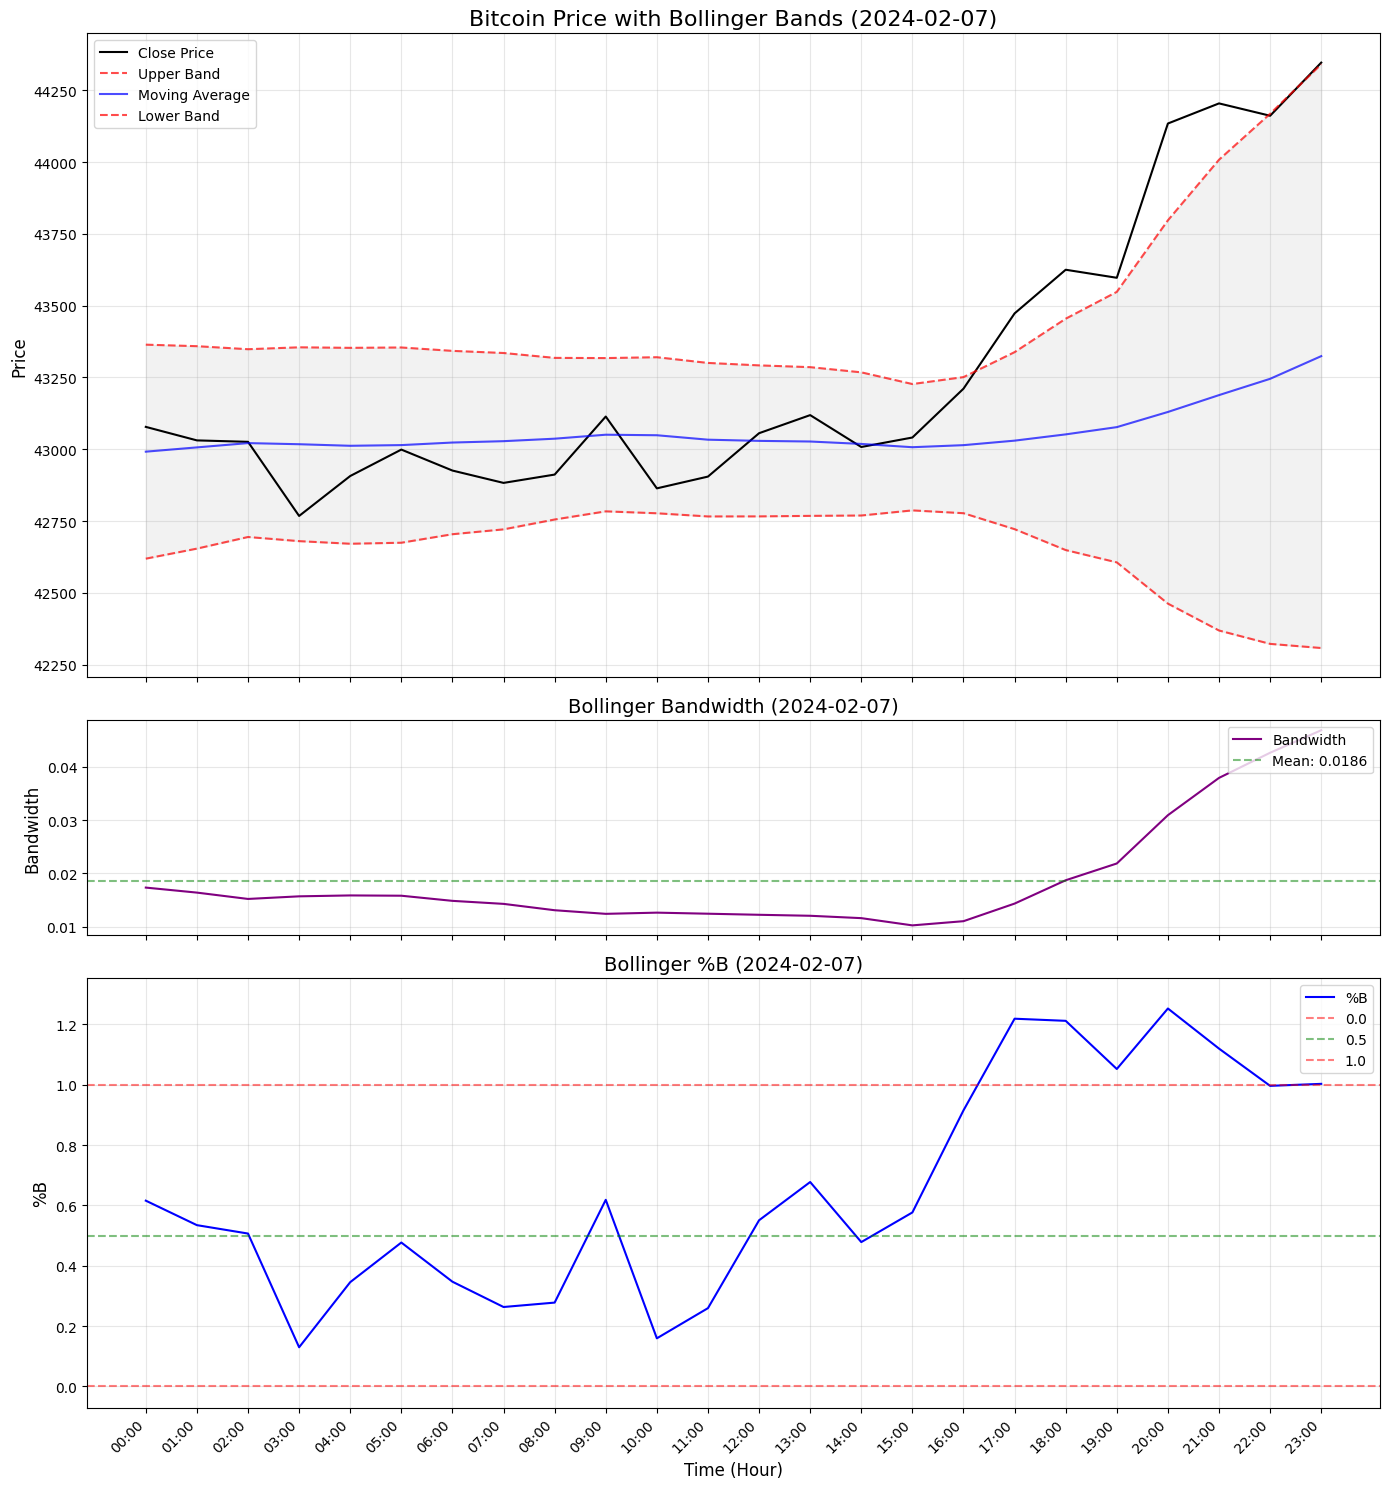

In [13]:
plot_indicators(df_with_bollinger, indicator_name='all_bb', date='2024-02-07', max_ticks=24)

In [14]:
df_with_bollinger.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b
timestamp,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,NaN,NaN
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,NaN,NaN
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,NaN,NaN
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,NaN,NaN
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,NaN,NaN


## 2.2 Average True Range(ATR):
> A measure of market volatility. It calculates the average of the true range over a specified period

In [15]:
def atr(df, window=14):
    """
    Function to calculate the Average True Range (ATR).
    """
    df['high_low'] = df['high'] - df['low']
    df['high_prev_close'] = abs(df['high'] - df['close'].shift(1))
    df['low_prev_close'] = abs(df['low'] - df['close'].shift(1))
    df['true_range'] = df[['high_low', 'high_prev_close', 'low_prev_close']].max(axis=1)
    df['atr'] = df['true_range'].rolling(window=window).mean()
    df.drop(['high_low', 'high_prev_close', 'low_prev_close', 'true_range'], axis=1, inplace=True)
    return df

In [16]:
# Calculate ATR
df_with_atr = atr(df_with_bollinger)
df_with_atr

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr
timestamp,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12 08:00:00,96058.00,96434.00,96055.00,96350.00,20.404847,2.402512,2603.661341,95966.40,97104.565911,94828.234089,0.023720,0.668517,572.785714
2025-02-12 09:00:00,96353.00,96356.00,96030.00,96125.00,8.375477,2.404548,2605.944509,95931.45,96999.502724,94863.397276,0.022267,0.590609,539.642857
2025-02-12 10:00:00,96124.00,96195.00,95917.00,95977.00,27.868397,2.404944,2608.004687,95881.30,96829.518962,94933.081038,0.019779,0.550463,524.785714


In [17]:
df_with_atr.iloc[40]

,2022-02-15 04:00:00
open,43621.470000
high,43805.600000
low,43480.480000
close,43500.450000
volume,35.016873
xrp_vwap,0.823403
eth_vwap,3000.424177
bb_ma,42644.109000
bb_upper,43651.989267
bb_lower,41636.228733


In [18]:
df_with_atr.iloc[41]

,2022-02-15 05:00:00
open,43494.850000
high,43647.960000
low,43426.830000
close,43610.930000
volume,50.190819
xrp_vwap,0.823296
eth_vwap,3002.122149
bb_ma,42720.691500
bb_upper,43779.347149
bb_lower,41662.035851


In [19]:
# Checking for NaN
#df_with_atr.isnull().sum()

In [20]:
# Plot Close Price with ATR
# plot_with_indicators(df_with_atr[:500], indicator='ATR')

## 2.3 Commodity Channel Index(CCI)
> The Commodity Channel Index (CCI) measures a security’s
price variation from its average price. High positive values
indicate overbought conditions, while low negative values
indicate oversold conditions

In [21]:
def calculate_cci(df, window=20):
    """
    Function to calculate the Commodity Channel Index (CCI).

    Parameters:
    df (pd.DataFrame): DataFrame containing price data.
    Must have 'high', 'low', and 'close' columns.
    window (int): Period for calculating CCI (default: 20).

    Returns:
    pd.DataFrame: DataFrame with CCI added.
    """
    # Calculate Typical Price (TP)
    df['tp'] = (df['high'] + df['low'] + df['close']) / 3

    # Calculate Simple Moving Average (SMA) of TP
    df['sma_tp'] = df['tp'].rolling(window=window).mean()

    # Calculate Mean Deviation (MD)
    df['md'] = df['tp'].rolling(window=window).apply(lambda x: abs(x - x.mean()).mean())

    # Calculate CCI
    df['cci'] = (df['tp'] - df['sma_tp']) / (0.015 * df['md'])

    # Drop intermediate columns
    df.drop(['tp', 'sma_tp', 'md'], axis=1, inplace=True)

    return df

In [22]:
df_with_cci = calculate_cci(df_with_atr)

In [23]:
df_with_cci[19:23]

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr,cci
timestamp,,,,,,,,,,,,,,
2022-02-14 07:00:00,42189.01,42388.11,42124.31,42337.26,29.094963,0.791041,2858.534804,42194.3375,42757.311271,41631.363729,0.026685,0.626935,343.085000,28.895288
2022-02-14 08:00:00,42337.26,42438.52,42010.37,42044.94,56.369935,0.791332,2860.850895,42171.5500,42718.992825,41624.107175,0.025963,0.384362,335.087857,-1.746715
2022-02-14 09:00:00,42025.77,42233.52,41947.21,42079.28,217.707225,0.789190,2860.060337,42148.9055,42670.392508,41627.418492,0.024745,0.433243,333.350000,-21.903580
2022-02-14 10:00:00,42080.87,42297.12,41935.36,42237.62,24.379766,0.789136,2860.683520,42133.0385,42620.720686,41645.356314,0.023150,0.607223,323.706429,9.825696


## 2.4 RSI
> The Relative Strength Index (RSI) is a momentum oscillator used in technical analysis to measure the speed and change of price movements.

In [24]:
def calculate_rsi(df, window):
    """
    Function to calculate the Relative Strength Index (RSI) for a given window.

    Parameters:
    df (pd.DataFrame): DataFrame containing price data.
    Must have a 'close' column.
    window (int): Period for calculating RSI.

    Returns:
    pd.DataFrame: DataFrame with RSI added as a new column.
    """
    # Calculate daily price changes
    delta = df['close'].diff()

    # Separate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Calculate Relative Strength (RS)
    rs = gain / loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    # Add RSI to the DataFrame with a dynamic column name
    df[f'rsi_{window}'] = rsi

    return df


In [25]:
df_with_rsi_14 = calculate_rsi(df_with_cci, window=14)
df_with_rsi_30 = calculate_rsi(df_with_rsi_14, window=30)

In [26]:
df_with_rsi_30[60:80]

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr,cci,rsi_14,rsi_30
timestamp,,,,,,,,,,,,,,,,
2022-02-16 00:00:00,44590.75,44590.75,44151.97,44227.50,22.557258,0.845412,3167.582500,44101.6525,44592.877228,43610.427772,0.022277,0.628096,307.475000,81.436775,48.298649,69.730863
2022-02-16 01:00:00,44215.52,44220.45,43964.06,44015.35,32.328502,0.841548,3152.829762,44121.8735,44558.281085,43685.465915,0.019782,0.377954,302.855714,-25.035839,44.333535,68.328607
2022-02-16 02:00:00,44015.34,44110.88,43938.70,44096.06,15.952873,0.839221,3152.659083,44148.3610,44498.587630,43798.134370,0.015866,0.425333,299.359286,-48.687956,47.647255,68.467413
2022-02-16 03:00:00,44099.66,44199.79,43988.36,44018.95,19.729336,0.838576,3152.283965,44162.5240,44461.669038,43863.378962,0.013547,0.260026,293.242143,-55.111997,44.355788,67.142512
2022-02-16 04:00:00,44016.18,44016.18,43718.58,43931.03,53.075604,0.838056,3138.601090,44159.2505,44467.344135,43851.156865,0.013954,0.129625,292.940714,-153.915601,42.564298,62.847338
2022-02-16 05:00:00,43931.03,44160.39,43917.64,44086.54,13.439508,0.837931,3138.240040,44159.0420,44467.336515,43850.747485,0.013963,0.382414,297.250000,-61.348924,47.156501,66.188961
2022-02-16 06:00:00,44089.97,44228.96,44053.04,44053.04,31.904409,0.837893,3138.245880,44146.7300,44451.085811,43842.374189,0.013788,0.346085,293.299286,-26.170250,47.886605,65.278155
2022-02-16 07:00:00,44070.92,44230.14,43977.56,44227.69,28.122995,0.837860,3139.416552,44144.3245,44445.124805,43843.524195,0.013628,0.638573,289.422143,-2.559868,55.841665,59.079184
2022-02-16 08:00:00,44225.15,44362.01,44173.44,44188.22,42.084829,0.837280,3140.399640,44143.5030,44443.698748,43843.307252,0.013601,0.574480,279.141429,58.132683,50.744659,57.391506


## 2.5 MACD
> The MACD (Moving Average Convergence Divergence) is a technical indicator used in stock trading to analyze the momentum of a stock's price. It helps identify potential buy and sell signals by comparing two moving averages of a stock's price.

In [27]:
def calculate_macd(df, short_window=12, long_window=26, signal_window=9, price_col='close'):
    """
    Calculate MACD, Signal Line.

    Parameters:
    df (pd.DataFrame): DataFrame containing price data.
    short_window (int): Period for short-term EMA (default: 12).
    long_window (int): Period for long-term EMA (default: 26).
    signal_window (int): Period for signal line EMA (default: 9).
    price_col (str): Name of the column containing price data (default: 'close').

    Returns:
    pd.DataFrame: DataFrame with MACD, Signal Line, and MACD Histogram added.
    """
    # Calculate short-term and long-term EMAs
    short_ema = df[price_col].ewm(span=short_window, adjust=False).mean()
    long_ema = df[price_col].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    df['macd'] = short_ema - long_ema

    # Calculate Signal line (EMA of MACD)
    df['signal'] = df['macd'].ewm(span=signal_window, adjust=True).mean()

    return df

In [28]:
df_with_macd = calculate_macd(df_with_rsi_30)

In [29]:
df_with_macd.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr,cci,rsi_14,rsi_30,macd,signal
timestamp,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.511225,1.395125
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.268097,3.392245
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500084,6.477556
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.579130,3.783397


## 2.6 EMA
> The Exponential Moving Average (EMA) is a type of moving average that places greater weight on recent price data, making it more responsive to new price movements compared to the Simple Moving Average (SMA).

In [30]:
def calculate_ema(df, span, price_col='close'):
    """
    Calculate Exponential Moving Average (EMA) with dynamic column names.

    Parameters:
    df (pd.DataFrame): DataFrame containing price data.
    span (int): Period for EMA calculation.
    price_col (str): Name of the column containing price data (default: 'close').

    Returns:
    pd.DataFrame: DataFrame with EMA added as a new column.
    """
    # Create dynamic column name
    ema_col = f'ema_{span}'

    # Calculate EMA
    df[ema_col] = df[price_col].ewm(span=span, adjust=False).mean()

    return df

In [31]:
df_with_ema_10 = calculate_ema(df_with_macd, 10)
df_with_ema_30 = calculate_ema(df_with_ema_10, 30)

In [32]:
df_with_ema_30.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30
timestamp,,,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,42500.690000,42500.690000
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.511225,1.395125,42506.413636,42502.720968
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.268097,3.392245,42515.240248,42506.091228
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500084,6.477556,42530.120203,42511.961471
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.579130,3.783397,42497.121984,42501.423957


In [33]:
df_with_ema_30['open-close'] = df_with_ema_30['open'] - df_with_ema_30['close']
df_with_ema_30['low-high'] = df_with_ema_30['low'] - df_with_ema_30['high']

In [34]:
df_with_ema_30

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,atr,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,42500.690000,42500.690000,-13.86,-199.81
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.511225,1.395125,42506.413636,42502.720968,-19.40,-186.98
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.268097,3.392245,42515.240248,42506.091228,-27.29,-510.22
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.500084,6.477556,42530.120203,42511.961471,-63.48,-265.10
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.579130,3.783397,42497.121984,42501.423957,251.96,-371.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12 08:00:00,96058.00,96434.00,96055.00,96350.00,20.404847,2.402512,2603.661341,95966.40,97104.565911,94828.234089,...,572.785714,45.532151,58.461254,42.845826,-330.558302,-418.686104,95944.429082,96378.539193,-292.00,-379.00
2025-02-12 09:00:00,96353.00,96356.00,96030.00,96125.00,8.375477,2.404548,2605.944509,95931.45,96999.502724,94863.397276,...,539.642857,41.188561,60.567158,42.496563,-293.732965,-393.695476,95977.260158,96362.181826,228.00,-326.00
2025-02-12 10:00:00,96124.00,96195.00,95917.00,95977.00,27.868397,2.404944,2608.004687,95881.30,96829.518962,94933.081038,...,524.785714,28.104276,56.795926,39.179331,-273.340089,-369.624399,95977.212857,96337.331385,147.00,-278.00


## Setting Y target
1. classification: 1-increase   0-decrease
2. regression: change of the specific price

In [35]:
df_with_ema_30['y_target2'] = df_with_ema_30['close'].diff()
df_with_ema_30['y_target2'] = df_with_ema_30['y_target2'].shift(-1)

In [36]:
df_with_ema_30.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high,y_target2
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,42500.690000,42500.690000,-13.86,-199.81,31.48
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,...,NaN,NaN,NaN,2.511225,1.395125,42506.413636,42502.720968,-19.40,-186.98,22.79
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,...,NaN,NaN,NaN,6.268097,3.392245,42515.240248,42506.091228,-27.29,-510.22,42.12
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,...,NaN,NaN,NaN,12.500084,6.477556,42530.120203,42511.961471,-63.48,-265.10,-248.45
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,...,NaN,NaN,NaN,-2.579130,3.783397,42497.121984,42501.423957,251.96,-371.91,-43.77


In [37]:
df_with_ema_30['y_target'] = (df_with_ema_30['y_target2'] > 0).astype(int)

In [38]:
df_with_ema_30.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high,y_target2,y_target
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,42500.690000,42500.690000,-13.86,-199.81,31.48,1
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,...,NaN,NaN,2.511225,1.395125,42506.413636,42502.720968,-19.40,-186.98,22.79,1
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,...,NaN,NaN,6.268097,3.392245,42515.240248,42506.091228,-27.29,-510.22,42.12,1
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,...,NaN,NaN,12.500084,6.477556,42530.120203,42511.961471,-63.48,-265.10,-248.45,0
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,...,NaN,NaN,-2.579130,3.783397,42497.121984,42501.423957,251.96,-371.91,-43.77,0


In [39]:
df_whole = df_with_ema_30.copy()

In [40]:
df_whole.describe()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high,y_target2,y_target
count,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26262.000000,26262.000000,26262.000000,...,26268.000000,26252.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26281.000000,26280.000000,26281.000000
mean,43258.611821,43413.315913,43098.366551,43260.662449,87.483219,0.662769,2281.236520,43241.951554,43958.862777,42525.040331,...,50.572362,50.528384,14.360381,14.406838,43251.492025,43230.967744,-2.050628,-314.949362,2.048490,0.506221
std,23594.339700,23684.310212,23501.427484,23596.522828,119.620629,0.535726,781.911931,23578.533695,24003.155166,23168.774460,...,16.474757,12.074656,299.473021,281.094477,23582.513153,23552.271332,278.334298,344.159117,278.676928,0.499971
min,15620.000000,15741.000000,15479.000000,15632.000000,0.000000,0.298072,962.303707,15776.500000,15959.379310,15367.809561,...,2.843052,10.279263,-2307.134039,-2024.166199,15749.045872,15888.657068,-5043.000000,-7223.000000,-3687.000000,0.000000
25%,24786.000000,24899.990000,24653.000000,24785.000000,24.316579,0.428324,1640.538869,24685.800000,25199.464709,24334.609321,...,39.118124,42.567497,-91.867254,-87.389769,24728.540034,24661.352804,-82.000000,-393.000000,-75.932500,0.000000
50%,35092.000000,35216.030000,34982.000000,35087.000000,49.416378,0.519169,2040.648398,35043.125000,35565.312062,34574.735649,...,50.291291,50.359356,4.675134,4.961848,35080.319522,35026.675299,-2.000000,-211.000000,2.000000,1.000000
75%,61842.000000,62043.000000,61622.000000,61847.000000,103.593708,0.616667,2964.144626,61888.887500,62938.129454,60684.297341,...,61.789321,58.391785,118.295991,114.286308,61838.988237,61880.747205,76.000000,-108.000000,82.000000,1.000000
max,108293.000000,109356.000000,107655.000000,108276.000000,2477.217741,3.306017,4067.575000,106935.100000,110845.138588,105973.466543,...,100.000000,88.293284,2188.263415,1948.504181,107216.626904,106458.302714,3644.000000,0.000000,5042.000000,1.000000


In [41]:
df_whole.isnull().sum()

,0
open,0
high,0
low,0
close,0
volume,0
xrp_vwap,0
eth_vwap,0
bb_ma,19
bb_upper,19
bb_lower,19


In [42]:
df_whole_filtered = df_whole[30:-1]

In [43]:
df_whole_filtered.isnull().sum()

,0
open,0
high,0
low,0
close,0
volume,0
xrp_vwap,0
eth_vwap,0
bb_ma,0
bb_upper,0
bb_lower,0


In [44]:
X = df_whole_filtered.iloc[:, :-2]
y = df_whole_filtered.iloc[:, -1]

In [45]:
X.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,atr,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-14 18:00:00,42593.53,42689.92,42235.62,42259.82,43.153709,0.793561,2910.139541,42207.4515,42817.774023,41597.128977,...,353.619286,49.927458,56.083735,47.621173,65.557661,20.273082,42418.281814,42328.431158,333.71,-454.30
2022-02-14 19:00:00,42243.18,42296.42,41825.39,42150.00,109.553314,0.793407,2907.549431,42211.0645,42819.004775,41603.124225,...,369.370000,-31.888717,57.597465,46.283210,41.094205,24.440608,42369.503302,42316.919470,93.18,-471.03
2022-02-14 20:00:00,42147.80,42337.04,42004.66,42208.31,76.562761,0.793427,2907.052493,42214.2315,42821.381451,41607.081549,...,355.091429,-8.151362,49.980027,46.651792,26.110879,24.774874,42340.195429,42309.912407,-60.51,-332.38
2022-02-14 21:00:00,42201.48,42309.46,42133.66,42256.83,21.277854,0.793450,2907.102387,42242.6980,42796.946524,41688.449476,...,348.805714,-0.311425,47.852875,46.717666,17.944788,23.408164,42325.038078,42306.487736,-55.35,-175.80
2022-02-14 22:00:00,42263.96,42763.74,42242.36,42702.29,69.104833,0.793598,2907.378130,42291.6705,42825.211921,41758.129079,...,355.465000,88.024309,66.221972,53.286766,46.877624,28.103961,42393.629337,42332.023366,-438.33,-521.38


In [46]:
y = df_whole_filtered.iloc[:, -1]

In [47]:
X.shape, y.shape

((26250, 22), (26250,))

In [48]:
X.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,atr,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-14 18:00:00,42593.53,42689.92,42235.62,42259.82,43.153709,0.793561,2910.139541,42207.4515,42817.774023,41597.128977,...,353.619286,49.927458,56.083735,47.621173,65.557661,20.273082,42418.281814,42328.431158,333.71,-454.30
2022-02-14 19:00:00,42243.18,42296.42,41825.39,42150.00,109.553314,0.793407,2907.549431,42211.0645,42819.004775,41603.124225,...,369.370000,-31.888717,57.597465,46.283210,41.094205,24.440608,42369.503302,42316.919470,93.18,-471.03
2022-02-14 20:00:00,42147.80,42337.04,42004.66,42208.31,76.562761,0.793427,2907.052493,42214.2315,42821.381451,41607.081549,...,355.091429,-8.151362,49.980027,46.651792,26.110879,24.774874,42340.195429,42309.912407,-60.51,-332.38
2022-02-14 21:00:00,42201.48,42309.46,42133.66,42256.83,21.277854,0.793450,2907.102387,42242.6980,42796.946524,41688.449476,...,348.805714,-0.311425,47.852875,46.717666,17.944788,23.408164,42325.038078,42306.487736,-55.35,-175.80
2022-02-14 22:00:00,42263.96,42763.74,42242.36,42702.29,69.104833,0.793598,2907.378130,42291.6705,42825.211921,41758.129079,...,355.465000,88.024309,66.221972,53.286766,46.877624,28.103961,42393.629337,42332.023366,-438.33,-521.38


In [49]:
y.head()

,y_target
timestamp,
2022-02-14 18:00:00,0
2022-02-14 19:00:00,1
2022-02-14 20:00:00,1
2022-02-14 21:00:00,1
2022-02-14 22:00:00,0


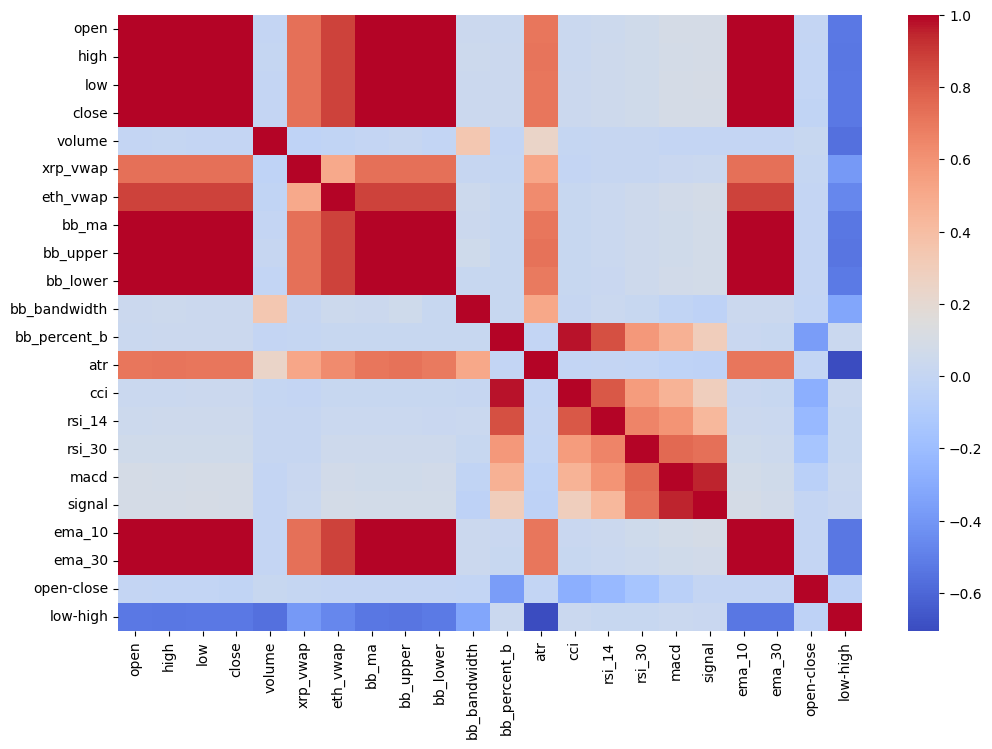

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.show()

In [ ]:
X_selecet = X.iloc[:, 4:]

In [ ]:
X_selecet.head()

,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high
timestamp,,,,,,,,,,,,,,,,,,
2022-02-14 18:00:00,43.153709,0.793561,2910.139541,42207.4515,42817.774023,41597.128977,0.028920,0.542902,353.619286,49.927458,56.083735,47.621173,65.557661,20.273082,42418.281814,42328.431158,333.71,-454.30
2022-02-14 19:00:00,109.553314,0.793407,2907.549431,42211.0645,42819.004775,41603.124225,0.028805,0.449778,369.370000,-31.888717,57.597465,46.283210,41.094205,24.440608,42369.503302,42316.919470,93.18,-471.03
2022-02-14 20:00:00,76.562761,0.793427,2907.052493,42214.2315,42821.381451,41607.081549,0.028765,0.495124,355.091429,-8.151362,49.980027,46.651792,26.110879,24.774874,42340.195429,42309.912407,-60.51,-332.38
2022-02-14 21:00:00,21.277854,0.793450,2907.102387,42242.6980,42796.946524,41688.449476,0.026241,0.512749,348.805714,-0.311425,47.852875,46.717666,17.944788,23.408164,42325.038078,42306.487736,-55.35,-175.80
2022-02-14 22:00:00,69.104833,0.793598,2907.378130,42291.6705,42825.211921,41758.129079,0.025232,0.884806,355.465000,88.024309,66.221972,53.286766,46.877624,28.103961,42393.629337,42332.023366,-438.33,-521.38


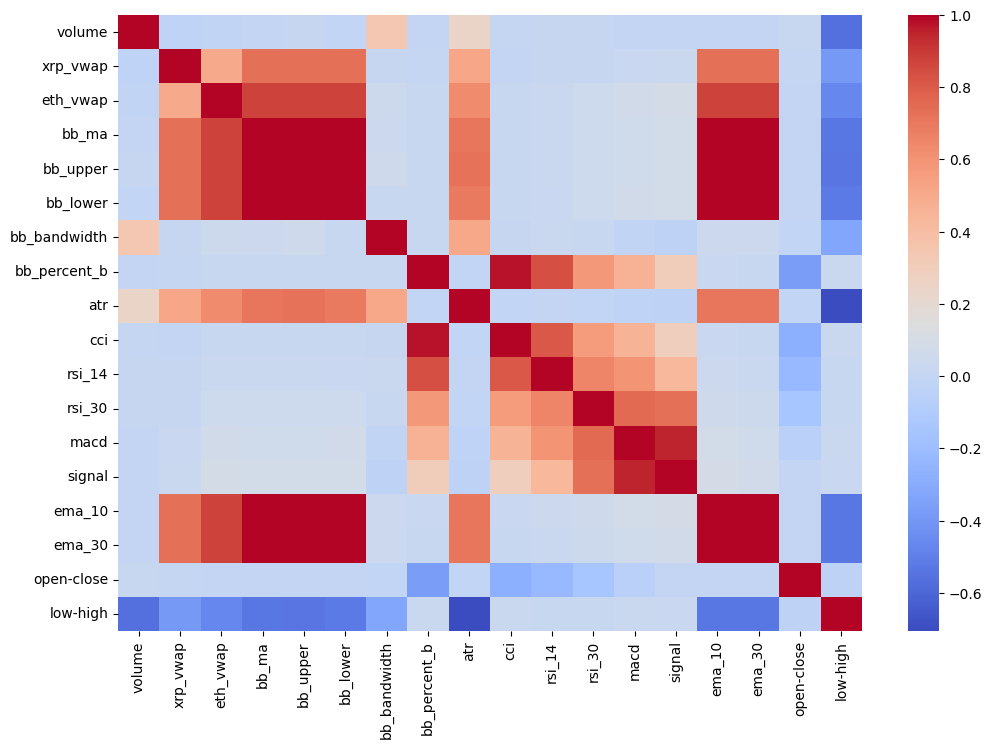

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_selecet.corr(), cmap='coolwarm')
plt.show()

In [ ]:
X1 = X_selecet.copy()

In [ ]:
X1.head()

,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high
timestamp,,,,,,,,,,,,,,,,,,
2022-02-14 18:00:00,43.153709,0.793561,2910.139541,42207.4515,42817.774023,41597.128977,0.028920,0.542902,353.619286,49.927458,56.083735,47.621173,65.557661,20.273082,42418.281814,42328.431158,333.71,-454.30
2022-02-14 19:00:00,109.553314,0.793407,2907.549431,42211.0645,42819.004775,41603.124225,0.028805,0.449778,369.370000,-31.888717,57.597465,46.283210,41.094205,24.440608,42369.503302,42316.919470,93.18,-471.03
2022-02-14 20:00:00,76.562761,0.793427,2907.052493,42214.2315,42821.381451,41607.081549,0.028765,0.495124,355.091429,-8.151362,49.980027,46.651792,26.110879,24.774874,42340.195429,42309.912407,-60.51,-332.38
2022-02-14 21:00:00,21.277854,0.793450,2907.102387,42242.6980,42796.946524,41688.449476,0.026241,0.512749,348.805714,-0.311425,47.852875,46.717666,17.944788,23.408164,42325.038078,42306.487736,-55.35,-175.80
2022-02-14 22:00:00,69.104833,0.793598,2907.378130,42291.6705,42825.211921,41758.129079,0.025232,0.884806,355.465000,88.024309,66.221972,53.286766,46.877624,28.103961,42393.629337,42332.023366,-438.33,-521.38


# 3.Reduce dimension
> Solving highly correlated problem

## 3.1 PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

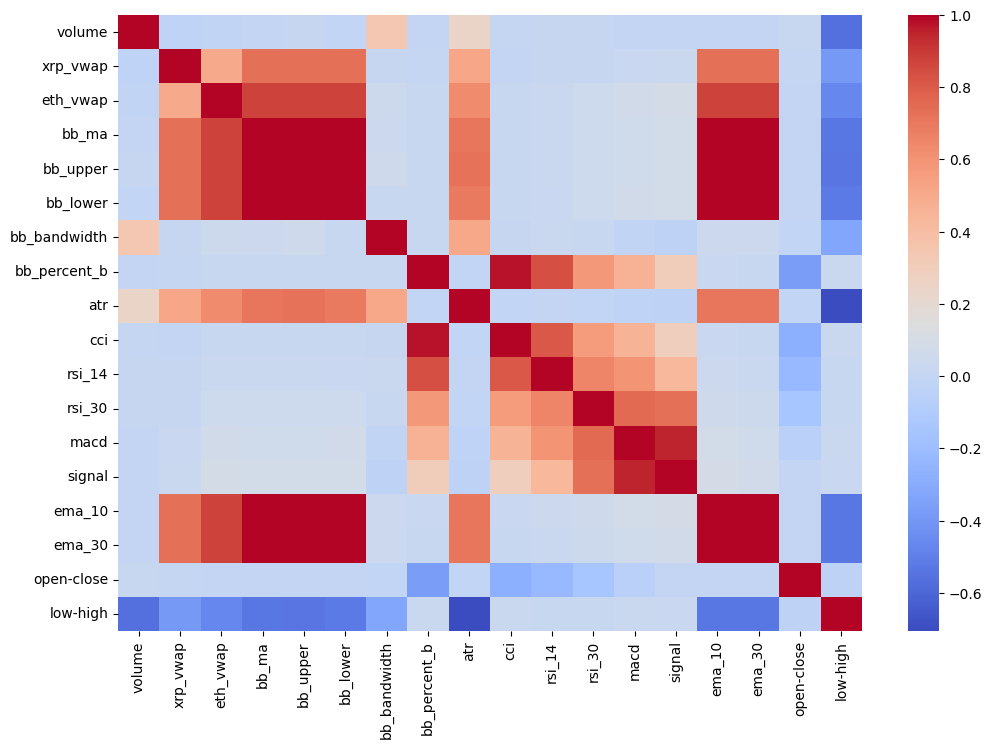

In [ ]:
df_scaled = pd.DataFrame(X1_scaled, columns=X1.columns, index=X1.index)

plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), cmap='coolwarm')
plt.show()

In [ ]:
df_scaled.head()

,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,bb_bandwidth,bb_percent_b,atr,cci,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high
timestamp,,,,,,,,,,,,,,,,,,
2022-02-14 18:00:00,-0.370883,0.244488,0.805032,-0.043804,-0.047472,-0.039975,-0.138422,0.110262,0.147635,0.406764,0.334492,-0.240802,0.170584,0.020526,-0.035277,-0.038260,1.205970,-0.404760
2022-02-14 19:00:00,0.183964,0.244201,0.801720,-0.043651,-0.047421,-0.039717,-0.142759,-0.173717,0.208620,-0.292871,0.426360,-0.351610,0.088937,0.035344,-0.037345,-0.038748,0.341998,-0.453347
2022-02-14 20:00:00,-0.091711,0.244237,0.801084,-0.043516,-0.047322,-0.039546,-0.144249,-0.035437,0.153335,-0.089886,-0.035941,-0.321084,0.038929,0.036533,-0.038587,-0.039046,-0.210049,-0.050678
2022-02-14 21:00:00,-0.553682,0.244280,0.801148,-0.042309,-0.048340,-0.036034,-0.239170,0.018310,0.128997,-0.022844,-0.165038,-0.315629,0.011675,0.031673,-0.039229,-0.039191,-0.191515,0.404063
2022-02-14 22:00:00,-0.154031,0.244558,0.801501,-0.040232,-0.047162,-0.033027,-0.277139,1.152880,0.154781,0.732541,0.949781,0.228410,0.108239,0.048370,-0.036322,-0.038107,-1.567161,-0.599574


In [ ]:
pca_features = ['xrp_vwap', 'eth_vwap', 'bb_ma', 'bb_upper', 'bb_lower', 'ema_10', 'ema_30']

In [ ]:
from sklearn.decomposition import PCA

X_pca = df_scaled[pca_features].to_numpy()

In [ ]:
X_pca.shape

(26250, 7)

In [ ]:
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_pca)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance[0]

np.float64(0.9054919284043712)

In [ ]:
explained_variance[1]

np.float64(0.07437827900731163)

In [ ]:
X_pca_reduced.shape

(26250, 2)

In [ ]:
pca1 = X_pca_reduced[:,0]
pca2 = X_pca_reduced[:,1]

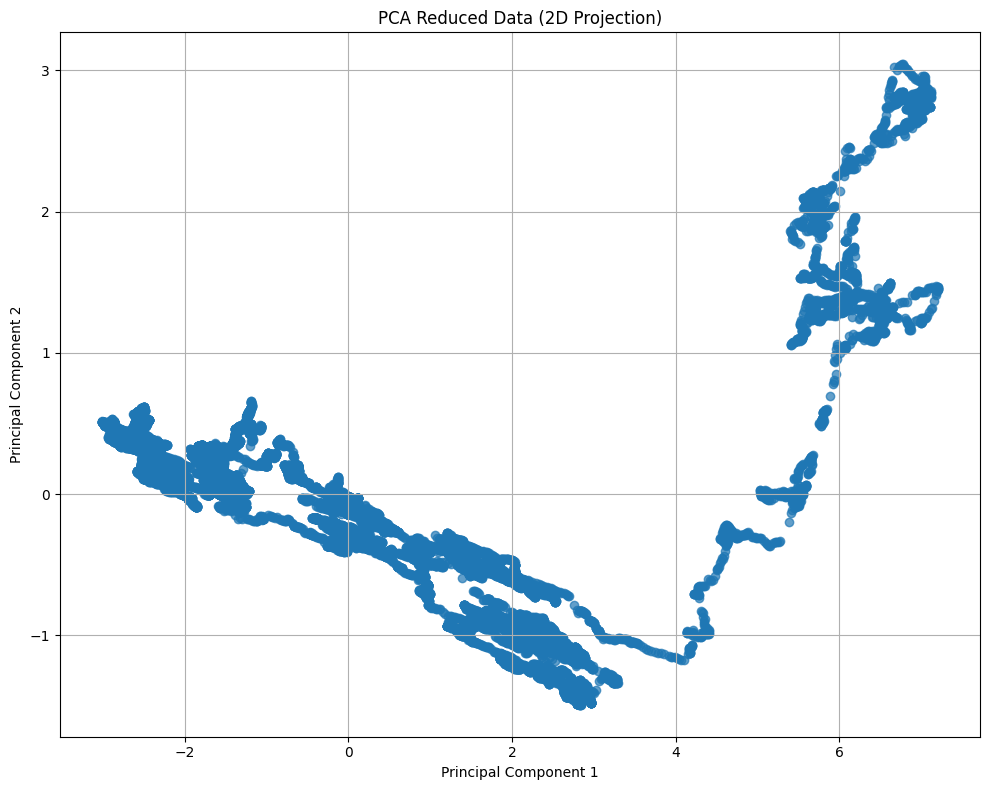

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(pca1, pca2, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduced Data (2D Projection)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Convert PCA results to a pandas DataFrame
pca_df = pd.DataFrame({
    'PCA1': pca1,
    'PCA2': pca2
}, index=df_scaled.index)  # Use the same index as the original data

In [ ]:
pca_df.head()

,PCA1,PCA2
timestamp,,
2022-02-14 18:00:00,0.277176,-0.168877
2022-02-14 19:00:00,0.275093,-0.167419
2022-02-14 20:00:00,0.274431,-0.167026
2022-02-14 21:00:00,0.275619,-0.167155
2022-02-14 22:00:00,0.279885,-0.167567


In [ ]:
type(pca_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# Then follow the same process
remaining_features = [col for col in df_scaled.columns if col not in pca_features]
df_remaining = df_scaled[remaining_features]

In [ ]:
df_remaining.head()

,volume,bb_bandwidth,bb_percent_b,atr,cci,rsi_14,rsi_30,macd,signal,open-close,low-high
timestamp,,,,,,,,,,,
2022-02-14 18:00:00,-0.370883,-0.138422,0.110262,0.147635,0.406764,0.334492,-0.240802,0.170584,0.020526,1.205970,-0.404760
2022-02-14 19:00:00,0.183964,-0.142759,-0.173717,0.208620,-0.292871,0.426360,-0.351610,0.088937,0.035344,0.341998,-0.453347
2022-02-14 20:00:00,-0.091711,-0.144249,-0.035437,0.153335,-0.089886,-0.035941,-0.321084,0.038929,0.036533,-0.210049,-0.050678
2022-02-14 21:00:00,-0.553682,-0.239170,0.018310,0.128997,-0.022844,-0.165038,-0.315629,0.011675,0.031673,-0.191515,0.404063
2022-02-14 22:00:00,-0.154031,-0.277139,1.152880,0.154781,0.732541,0.949781,0.228410,0.108239,0.048370,-1.567161,-0.599574


In [ ]:
# Merge with PCA results
final_df = pd.concat([df_remaining, pca_df], axis=1)

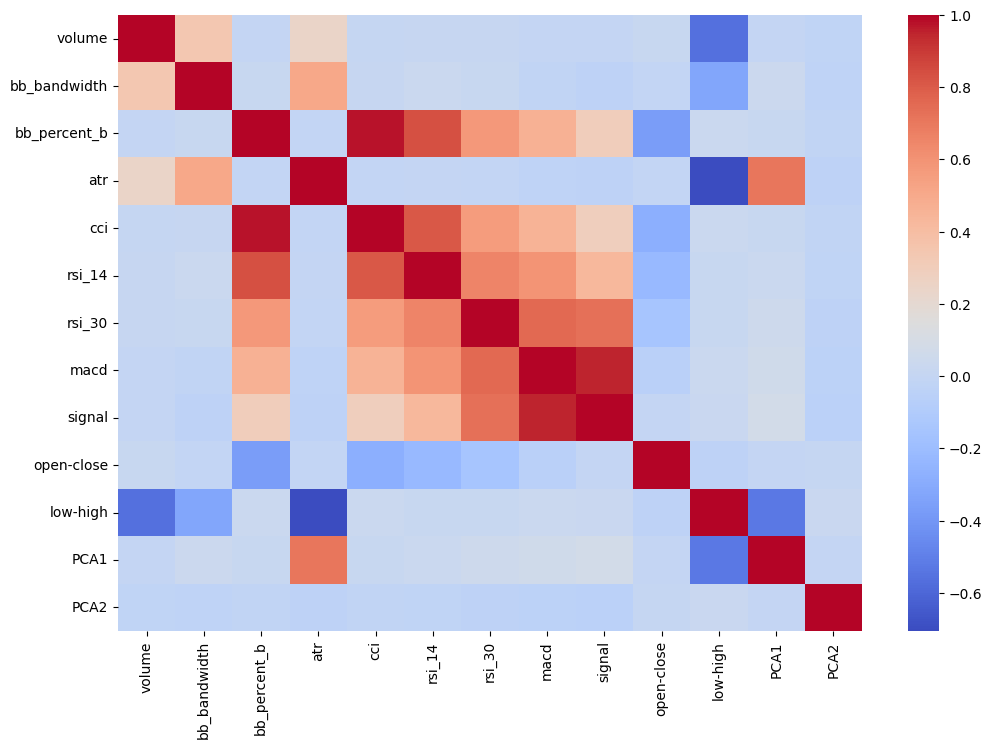

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), cmap='coolwarm')
plt.show()

## 3.2 Checking VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Function to calculate VIF for all columns in a DataFrame
def calculate_vif(df):
    # Create a DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns

    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    # Sort by VIF value (optional)
    return vif_data.sort_values("VIF", ascending=False)

In [ ]:
# Calculate VIF
vif_results = calculate_vif(final_df)

In [ ]:
print(vif_results)

        Variable        VIF
2   bb_percent_b  30.277119
4            cci  24.048406
7           macd  20.075954
8         signal  18.342438
3            atr   4.981765
5         rsi_14   4.838847
6         rsi_30   3.314610
10      low-high   3.294769
11          PCA1   3.070487
1   bb_bandwidth   2.012958
0         volume   1.910354
9     open-close   1.455641
12          PCA2   1.005419


In [ ]:
final_df2 = final_df[['cci', 'macd', 'atr', 'rsi_14', 'rsi_30', 'low-high', 'PCA1', 'bb_bandwidth', 'volume', 'open-close', 'PCA2']]

In [ ]:
vif2_results = calculate_vif(final_df2)

In [ ]:
print(vif2_results)

        Variable       VIF
2            atr  4.971475
3         rsi_14  3.710889
5       low-high  3.291052
0            cci  3.071179
6           PCA1  3.061747
4         rsi_30  2.848135
1           macd  2.572553
7   bb_bandwidth  2.010620
8         volume  1.910056
9     open-close  1.100455
10          PCA2  1.004762


In [ ]:
X_logistic = final_df[['atr', 'rsi_14', 'rsi_30', 'low-high', 'PCA1', 'bb_bandwidth', 'volume', 'open-close', 'PCA2']]

In [ ]:
X_logistic.head()

,atr,rsi_14,rsi_30,low-high,PCA1,bb_bandwidth,volume,open-close,PCA2
timestamp,,,,,,,,,
2022-02-14 18:00:00,0.147635,0.334492,-0.240802,-0.404760,0.277176,-0.138422,-0.370883,1.205970,-0.168877
2022-02-14 19:00:00,0.208620,0.426360,-0.351610,-0.453347,0.275093,-0.142759,0.183964,0.341998,-0.167419
2022-02-14 20:00:00,0.153335,-0.035941,-0.321084,-0.050678,0.274431,-0.144249,-0.091711,-0.210049,-0.167026
2022-02-14 21:00:00,0.128997,-0.165038,-0.315629,0.404063,0.275619,-0.239170,-0.553682,-0.191515,-0.167155
2022-02-14 22:00:00,0.154781,0.949781,0.228410,-0.599574,0.279885,-0.277139,-0.154031,-1.567161,-0.167567


In [ ]:
y.head()

,y_target
timestamp,
2022-02-14 18:00:00,0
2022-02-14 19:00:00,1
2022-02-14 20:00:00,1
2022-02-14 21:00:00,1
2022-02-14 22:00:00,0


In [ ]:
X_logistic.shape, y.shape

((26250, 9), (26250,))

# 4.Train Model


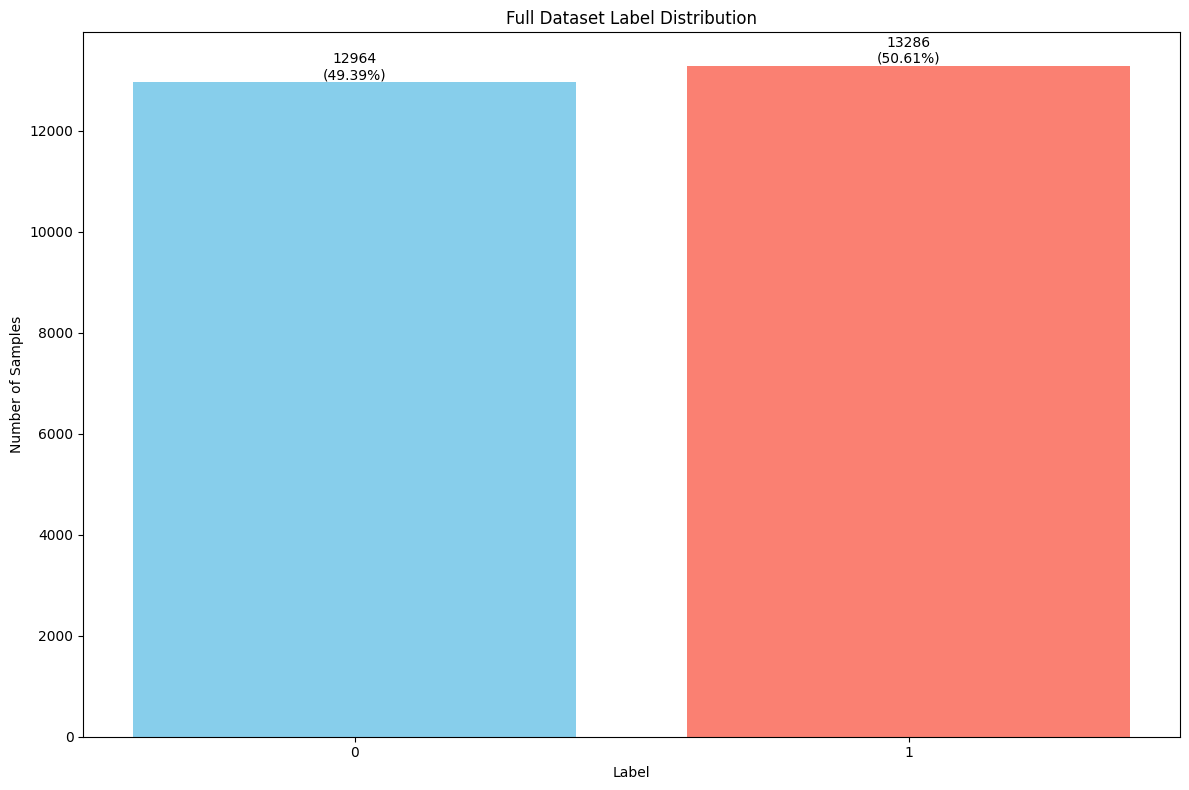

In [ ]:
# Checking distribution of y values in whole dataset

# Get unique label values
unique_labels = np.unique(y)

# Calculate count for each label
full_label_counts = [np.sum(y == label) for label in unique_labels]

# Create plot
plt.figure(figsize=(12, 8))
plt.bar(unique_labels, full_label_counts, color=['skyblue', 'salmon'])
plt.title('Full Dataset Label Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.xticks(unique_labels)  # Set x-ticks to actual unique labels

# Add label to each bar
for label, count in zip(unique_labels, full_label_counts):
    percentage = count / len(y) * 100
    plt.text(label, count, f'{count}\n({percentage:.2f}%)',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4-1 Algorithm1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Split data chronologically (e.g., use first 80% for training)
split_point = int(len(final_df2) * 0.8)
X_train = final_df2.iloc[:split_point]
X_test = final_df2.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 11), (5250, 11), (21000,), (5250,))

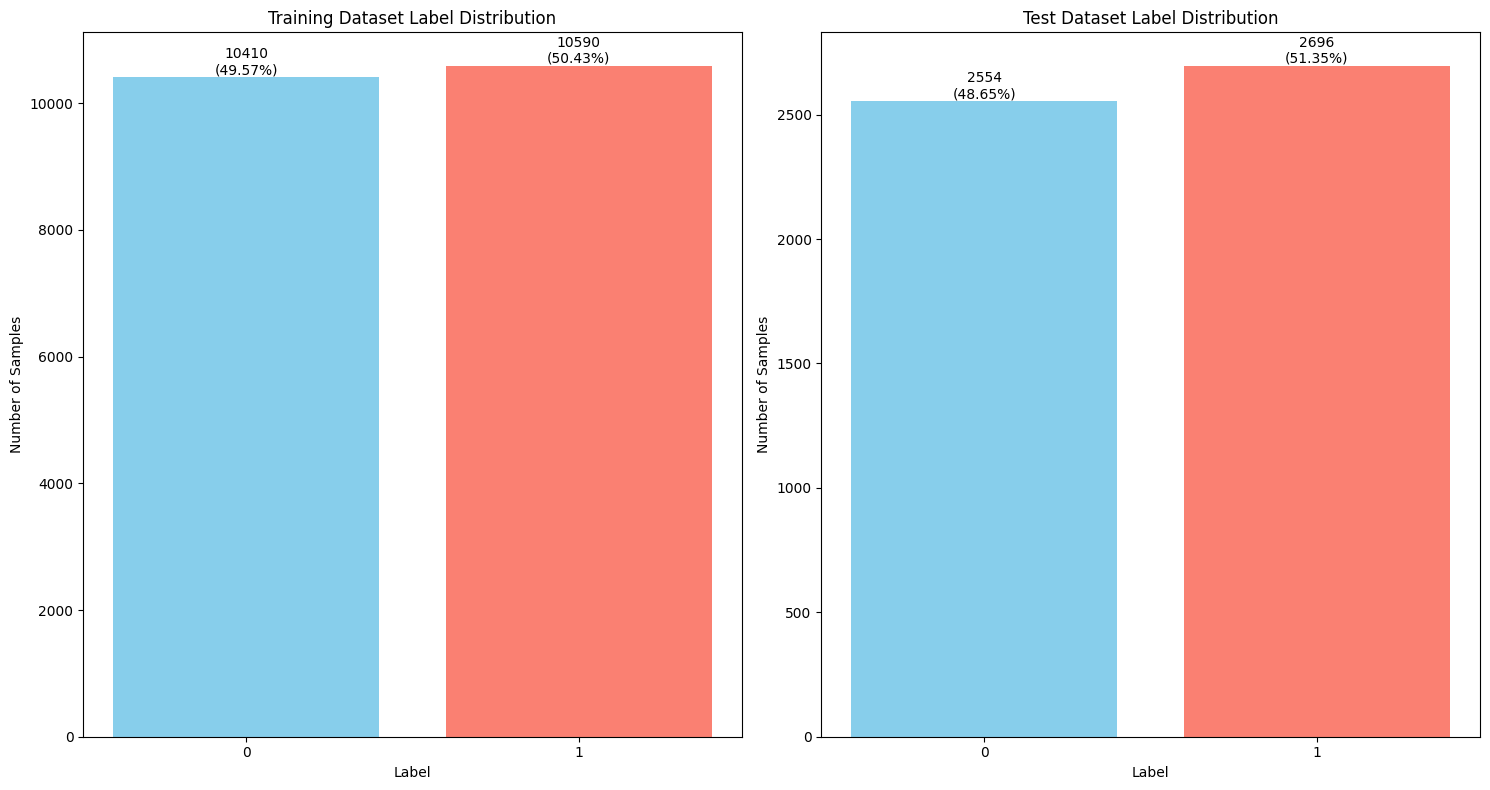

In [ ]:
# Training data label distribution
unique_train_labels = np.unique(y_train)
train_label_counts = [np.sum(y_train == label) for label in unique_train_labels]

# Test data label distribution
unique_test_labels = np.unique(y_test)
test_label_counts = [np.sum(y_test == label) for label in unique_test_labels]

# Create subplot
plt.figure(figsize=(15, 8))

# Training data subplot
plt.subplot(1, 2, 1)
plt.bar(unique_train_labels, train_label_counts, color=['skyblue', 'salmon'])
plt.title('Training Dataset Label Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.xticks(unique_train_labels)  # Set x-ticks to actual unique labels

# Add label to training data bars
for label, count in zip(unique_train_labels, train_label_counts):
    percentage = count / len(y_train) * 100
    plt.text(label, count, f'{count}\n({percentage:.2f}%)',
             ha='center', va='bottom')

# Test data subplot
plt.subplot(1, 2, 2)
plt.bar(unique_test_labels, test_label_counts, color=['skyblue', 'salmon'])
plt.title('Test Dataset Label Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.xticks(unique_test_labels)  # Set x-ticks to actual unique labels

# Add label to test data bars
for label, count in zip(unique_test_labels, test_label_counts):
    percentage = count / len(y_test) * 100
    plt.text(label, count, f'{count}\n({percentage:.2f}%)',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Initialize model with specified hyperparameters
model = LogisticRegression(
    C=0.1,                # Inverse of regularization strength (smaller = stronger regularization)
    penalty='l1',         # L1 regularization (Lasso)
    solver='liblinear',   # Solver that supports L1 regularization
    random_state=42       # For reproducibility (recommended)
)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
y_pred_train = model.predict(X_train)

# Predict on test set
y_pred_test = model.predict(X_test)

In [ ]:
# Evaluate performance on both sets
print("\nTraining set accuracy:", accuracy_score(y_train, y_pred_train))
print("Test set accuracy:", accuracy_score(y_test, y_pred_test))


Training set accuracy: 0.5347142857142857
Test set accuracy: 0.535047619047619


In [ ]:
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.48      0.50     10410
           1       0.53      0.59      0.56     10590

    accuracy                           0.53     21000
   macro avg       0.53      0.53      0.53     21000
weighted avg       0.53      0.53      0.53     21000



In [ ]:
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Test Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48      2554
           1       0.54      0.63      0.58      2696

    accuracy                           0.54      5250
   macro avg       0.53      0.53      0.53      5250
weighted avg       0.53      0.54      0.53      5250



## 4-2 Algorithm2: SVC

In [ ]:
#方法1.使用超参数
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 参数分布（缩小范围）
param_dist = {
    'C': uniform(0.1, 2),  # 缩小C的范围
    'gamma': ['scale'],     # 只使用一个gamma值
    'kernel': ['rbf']       # 仅使用RBF核函数
}

# 随机搜索，减少迭代次数（例如 10 次）
svc = SVC(probability=True)
random_search = RandomizedSearchCV(svc, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=2, n_jobs=-1)

# 训练
random_search.fit(X_train_scaled, y_train)

# 预测（测试集）
best_svc = random_search.best_estimator_
y_pred_test = best_svc.predict(X_test_scaled)

# 评估
print("Best parameters:", random_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# 预测（训练集）
y_pred_train = best_svc.predict(X_train_scaled)

# 评估训练集效果
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTrain Classification Report:\n", classification_report(y_train, y_pred_train))

Fitting 3 folds for each of 10 candidates, totalling 30 fits



KeyboardInterrupt



## 4-3 Algorithm3: XGBoost

In [116]:
df_whole.head()

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,rsi_14,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high,y_target2,y_target
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,42500.690000,42500.690000,-13.86,-199.81,31.48,1
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,...,NaN,NaN,2.511225,1.395125,42506.413636,42502.720968,-19.40,-186.98,22.79,1
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,...,NaN,NaN,6.268097,3.392245,42515.240248,42506.091228,-27.29,-510.22,42.12,1
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,...,NaN,NaN,12.500084,6.477556,42530.120203,42511.961471,-63.48,-265.10,-248.45,0
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,...,NaN,NaN,-2.579130,3.783397,42497.121984,42501.423957,251.96,-371.91,-43.77,0


In [117]:
df_close = df_whole['close']

In [118]:
df_diff = df_close.diff().dropna()

In [119]:
df_diff

,close
timestamp,
2022-02-13 13:00:00,31.48
2022-02-13 14:00:00,22.79
2022-02-13 15:00:00,42.12
2022-02-13 16:00:00,-248.45
2022-02-13 17:00:00,-43.77
...,...
2025-02-12 08:00:00,291.00
2025-02-12 09:00:00,-225.00
2025-02-12 10:00:00,-148.00


Dickey–Fuller test: p=0.000000


<Figure size 1500x700 with 0 Axes>

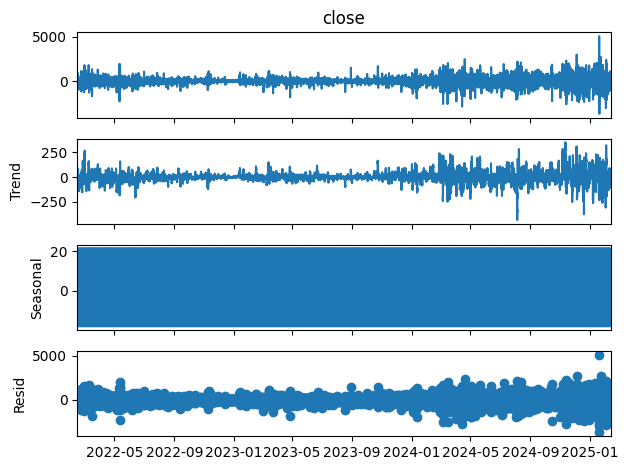

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Dicky-Fuller test to check state of stationary
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_diff)[1])
plt.figure(figsize=(15,7))
sm.tsa.seasonal_decompose(df_diff).plot()
plt.show()

(-0.3, 0.3)

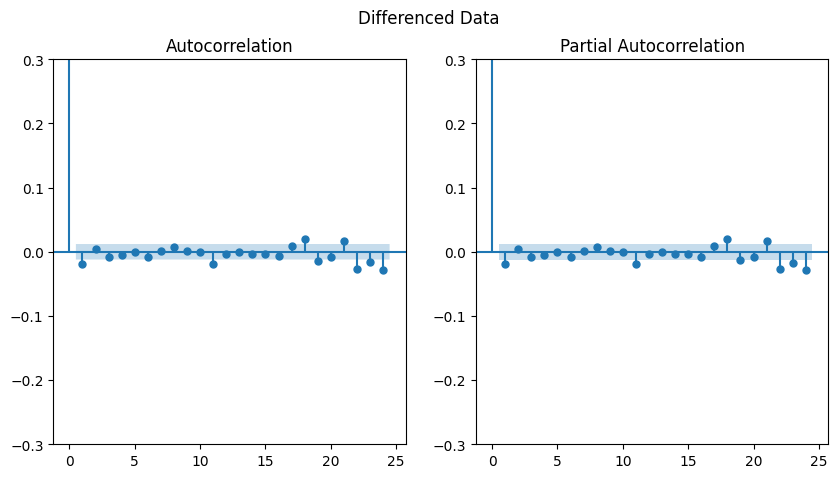

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(df_diff.values.squeeze(), lags=24, ax=ax[0], alpha=0.05)
sm.graphics.tsa.plot_pacf(df_diff.values.squeeze(), lags=24, ax=ax[1], alpha=0.05);
ax[0].set_ylim(-0.3, 0.3)
ax[1].set_ylim(-0.3, 0.3)

In [222]:
df_whole

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high,y_target2,y_target,previous_diff
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,...,NaN,0.000000,0.000000,42500.690000,42500.690000,-13.86,-199.81,31.48,1,NaN
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,...,NaN,2.511225,1.395125,42506.413636,42502.720968,-19.40,-186.98,22.79,1,31.48
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,...,NaN,6.268097,3.392245,42515.240248,42506.091228,-27.29,-510.22,42.12,1,22.79
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,...,NaN,12.500084,6.477556,42530.120203,42511.961471,-63.48,-265.10,-248.45,0,42.12
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,...,NaN,-2.579130,3.783397,42497.121984,42501.423957,251.96,-371.91,-43.77,0,-248.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12 08:00:00,96058.00,96434.00,96055.00,96350.00,20.404847,2.402512,2603.661341,95966.40,97104.565911,94828.234089,...,42.845826,-330.558302,-418.686104,95944.429082,96378.539193,-292.00,-379.00,-225.00,0,291.00
2025-02-12 09:00:00,96353.00,96356.00,96030.00,96125.00,8.375477,2.404548,2605.944509,95931.45,96999.502724,94863.397276,...,42.496563,-293.732965,-393.695476,95977.260158,96362.181826,228.00,-326.00,-148.00,0,-225.00
2025-02-12 10:00:00,96124.00,96195.00,95917.00,95977.00,27.868397,2.404944,2608.004687,95881.30,96829.518962,94933.081038,...,39.179331,-273.340089,-369.624399,95977.212857,96337.331385,147.00,-278.00,106.00,1,-148.00


In [223]:
df_whole['previous_diff'] = df_whole['y_target2'].shift(1)

In [224]:
df_whole

,open,high,low,close,volume,xrp_vwap,eth_vwap,bb_ma,bb_upper,bb_lower,...,rsi_30,macd,signal,ema_10,ema_30,open-close,low-high,y_target2,y_target,previous_diff
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-13 12:00:00,42486.83,42648.93,42449.12,42500.69,14.678620,0.838640,2937.937500,NaN,NaN,NaN,...,NaN,0.000000,0.000000,42500.690000,42500.690000,-13.86,-199.81,31.48,1,NaN
2022-02-13 13:00:00,42512.77,42603.92,42416.94,42532.17,20.029563,0.836473,2940.258471,NaN,NaN,NaN,...,NaN,2.511225,1.395125,42506.413636,42502.720968,-19.40,-186.98,22.79,1,31.48
2022-02-13 14:00:00,42527.67,42717.34,42207.12,42554.96,28.868347,0.831675,2937.326872,NaN,NaN,NaN,...,NaN,6.268097,3.392245,42515.240248,42506.091228,-27.29,-510.22,42.12,1,22.79
2022-02-13 15:00:00,42533.60,42779.60,42514.50,42597.08,19.760018,0.828943,2934.163471,NaN,NaN,NaN,...,NaN,12.500084,6.477556,42530.120203,42511.961471,-63.48,-265.10,-248.45,0,42.12
2022-02-13 16:00:00,42600.59,42607.53,42235.62,42348.63,29.558816,0.826687,2919.072788,NaN,NaN,NaN,...,NaN,-2.579130,3.783397,42497.121984,42501.423957,251.96,-371.91,-43.77,0,-248.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-12 08:00:00,96058.00,96434.00,96055.00,96350.00,20.404847,2.402512,2603.661341,95966.40,97104.565911,94828.234089,...,42.845826,-330.558302,-418.686104,95944.429082,96378.539193,-292.00,-379.00,-225.00,0,291.00
2025-02-12 09:00:00,96353.00,96356.00,96030.00,96125.00,8.375477,2.404548,2605.944509,95931.45,96999.502724,94863.397276,...,42.496563,-293.732965,-393.695476,95977.260158,96362.181826,228.00,-326.00,-148.00,0,-225.00
2025-02-12 10:00:00,96124.00,96195.00,95917.00,95977.00,27.868397,2.404944,2608.004687,95881.30,96829.518962,94933.081038,...,39.179331,-273.340089,-369.624399,95977.212857,96337.331385,147.00,-278.00,106.00,1,-148.00


In [225]:
df_whole_filtered = df_whole[30:-1]

In [226]:
df_whole_filtered.isnull().sum()

,0
open,0
high,0
low,0
close,0
volume,0
xrp_vwap,0
eth_vwap,0
bb_ma,0
bb_upper,0
bb_lower,0


In [544]:
X_features = ['xrp_vwap', 'eth_vwap', 'bb_ma', 'bb_upper', 'bb_lower', 'bb_bandwidth', 'bb_percent_b', 'atr', 'cci', 'rsi_14', 'rsi_30', 'macd', 'signal', 'ema_10', 'open-close', 'low-high', 'previous_diff']

In [545]:
X = df_whole_filtered[X_features]

In [546]:
y = df_whole_filtered['y_target']

In [547]:
X.shape, y.shape

((26250, 17), (26250,))

In [699]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

In [700]:
X_train1, X_val, y_train1, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=True
)

In [701]:
X_train.shape, y_train.shape

((21000, 17), (21000,))

In [702]:
X_val.shape, y_val.shape

((4200, 17), (4200,))

In [703]:
X_test.shape, y_test.shape

((5250, 17), (5250,))

In [704]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    early_stopping_rounds=20
)

In [690]:
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [0.001, 0.01],  #0.001, 0.01, 0.1
    'n_estimators': [300, 500, 700],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'min_child_weight': [2, 3],
    'gamma': [1],                # Minimum loss reduction for split
}


In [691]:
# GridSearchCV 설정 (scoring='neg_log_loss'로 Log Loss 최소화)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold 교차 검증
    scoring='neg_log_loss',  # Log Loss를 최소화 (음수로 변환해 최대화 문제로 처리)
    verbose=1
)

# 학습 실행
grid_search.fit(X_train1, y_train1, eval_set=[(X_val, y_val)])

# 최적 파라미터 출력
print("Best Parameters (Lowest Log Loss):", grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[0]	validation_0-logloss:0.69296
[1]	validation_0-logloss:0.69288
[2]	validation_0-logloss:0.69277
[3]	validation_0-logloss:0.69268
[4]	validation_0-logloss:0.69258
[5]	validation_0-logloss:0.69249
[6]	validation_0-logloss:0.69241
[7]	validation_0-logloss:0.69236
[8]	validation_0-logloss:0.69228
[9]	validation_0-logloss:0.69221
[10]	validation_0-logloss:0.69213
[11]	validation_0-logloss:0.69207
[12]	validation_0-logloss:0.69198
[13]	validation_0-logloss:0.69191
[14]	validation_0-logloss:0.69181
[15]	validation_0-logloss:0.69176
[16]	validation_0-logloss:0.69172
[17]	validation_0-logloss:0.69163
[18]	validation_0-logloss:0.69158
[19]	validation_0-logloss:0.69150
[20]	validation_0-logloss:0.69142
[21]	validation_0-logloss:0.69135
[22]	validation_0-logloss:0.69129
[23]	validation_0-logloss:0.69129
[24]	validation_0-logloss:0.69122
[25]	validation_0-logloss:0.69116
[26]	validation_0-logloss:0.69109
[27]	validation_0-logloss:0.69102

In [692]:
#Best Parameters (Lowest Log Loss): {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
best_params = grid_search.best_params_

In [693]:
final_model = XGBClassifier(
    **best_params
)

In [694]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [705]:
y_pred_train_xgb = final_model.predict(X_train)
y_pred_test_xgb = final_model.predict(X_test)

In [706]:
y_pred_train_xgb

array([1, 0, 0, ..., 1, 0, 0])

In [707]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix
)

In [708]:
print("\n[Train data report]")
print(classification_report(y_train, y_pred_train_xgb))

print("\n[Test data report]")
print(classification_report(y_test, y_pred_test_xgb))


[Train data report]
              precision    recall  f1-score   support

           0       0.58      0.55      0.56     10377
           1       0.58      0.60      0.59     10623

    accuracy                           0.58     21000
   macro avg       0.58      0.58      0.58     21000
weighted avg       0.58      0.58      0.58     21000


[Test data report]
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      2587
           1       0.57      0.59      0.58      2663

    accuracy                           0.56      5250
   macro avg       0.56      0.56      0.56      5250
weighted avg       0.56      0.56      0.56      5250



## 4-4 BaseLine Algorithm: LSTM

In [92]:
data = y

In [93]:
def data_preprocessing(data, num_lags, train_test_split):    #data:numpy,  num_lags:using how many previous lags as independent variables, train_test_split: setting % for training
    # Prepare the data for training
    x = []
    y = []
    for i in range(len(data) - num_lags):
        x.append(data[i:i + num_lags])
        y.append(data[i+ num_lags])
    # Convert the data to numpy arrays
    x = np.array(x)
    y = np.array(y)
    # Split the data into training and testing sets
    split_index = int(train_test_split * len(x))
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]

    return x_train, y_train, x_test, y_test

In [94]:
# 2, 7
num_lags = 7
train_test_split = 0.8
x_train, y_train, x_test, y_test = data_preprocessing(data, num_lags, train_test_split)

<ipython-input-93-dde242eec8e8>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i+ num_lags])


In [95]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20994, 7), (20994,), (5249, 7), (5249,))

In [96]:
x_train = x_train.reshape(-1,num_lags,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,num_lags,1)
y_test = y_test.reshape(-1,1)

In [97]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20994, 7, 1), (20994, 1), (5249, 7, 1), (5249, 1))

In [98]:
input_shape = (x_train.shape[1], x_train.shape[2])

In [99]:
input_shape

(7, 1)

In [100]:
import tensorflow as tf
from tensorflow import keras

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

def build_model(input_shape):
    model = Sequential([
        LSTM(40, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),

        # Add Flatten layer to convert 3D output to 2D
        Flatten(),

        Dense(60, activation='relu'),
        # BatchNormalization(),
        Dropout(0.2),

        # Make sure the final Dense layer outputs just one unit for binary classification
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.002),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Recall(name='recall_0'),
            tf.keras.metrics.Precision(name='precision_0')
        ]
    )

    # Print model summary to verify the output shape
    model.summary()

    return model

# 콜백 설정
callbacks = [
    ModelCheckpoint(
        '/content/drive/My Drive/DCU/Practicum/godBlessMe/best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min'
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=50,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=50,
        min_lr=1e-6
    )
]

# 모델 학습
input_shape = (x_train.shape[1], x_train.shape[2])
model = build_model(input_shape)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),  # Use test data for validation instead of splitting training data
    batch_size=32,       # 배치 크기 조정
    epochs=2000,          # 충분한 epoch
    shuffle=False,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 7, 40)               │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 7, 40)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 280)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 60)                  │          16,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,641 (92.35 KB)

 Trainable params: 23,641 (92.35 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 20994
'y' sizes: 21000


In [218]:

from tensorflow.keras.models import load_model
model1 = load_model('/content/drive/My Drive/DCU/Practicum/godBlessMe/best_model.keras')

In [219]:
print(model1.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 7, 40)               │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 7, 40)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 280)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 60)                  │          16,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,925 (277.05 KB)

 Trainable params: 23,641 (92.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,284 (184.71 KB)

None


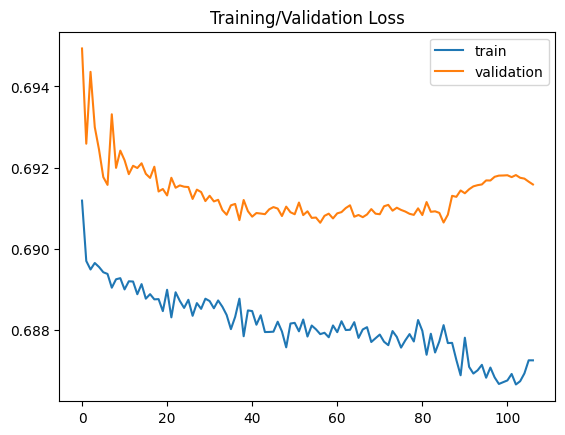

In [220]:
# Visualize the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('Training/Validation Loss');
# Evaluate the model >> model.metrics_names
plt.show()

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [106]:
y_pred_train_prob = model1.predict(x_train)
y_pred_test_prob = model1.predict(x_test)

y_pred_train = (y_pred_train_prob > 0.5).astype(int)  # True(>0.5)=1, False(≤0.5)=0
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [107]:
(y_pred_train < 0.5).sum()

np.int64(10693)

In [108]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix
)

In [109]:
print("\n[Train data report]")
print(classification_report(y_train, y_pred_train))

print("\n[Test data report]")
print(classification_report(y_test, y_pred_test))


[Train data report]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55     10408
           1       0.55      0.54      0.54     10586

    accuracy                           0.55     20994
   macro avg       0.55      0.55      0.55     20994
weighted avg       0.55      0.55      0.55     20994


[Test data report]
              precision    recall  f1-score   support

           0       0.52      0.56      0.54      2554
           1       0.55      0.51      0.53      2695

    accuracy                           0.54      5249
   macro avg       0.54      0.54      0.54      5249
weighted avg       0.54      0.54      0.54      5249

